### Import libraries

In [1]:
import numpy as np
import cv2
import os

**Parameter**

In [2]:
folder_path = "trafficSignData"
label_file = 'labels.csv'
imageDimesions = (32, 32)
imageDimesiontest = (32, 32, 3)
ratio = 0.2

### Load the images and number of classes

In [3]:
images = []
classNumber = []

In [4]:
# get the path of the traffic data
myList = os.listdir(folder_path)
print("View each classes in traffic folder :", myList, "\n")

# get the number of classes (number of folder)
lengthOfClasses = len(myList)
print("Total length of classes :", lengthOfClasses, "\n")


View each classes in traffic folder : ['32', '35', '34', '33', '20', '18', '27', '9', '0', '11', '7', '29', '16', '42', '6', '28', '17', '1', '10', '19', '26', '8', '21', '38', '36', '31', '30', '37', '39', '41', '24', '23', '4', '15', '3', '12', '40', '2', '13', '5', '14', '22', '25'] 

Total length of classes : 43 



### Iterate to load the images and classes

In [5]:
print("Iterating to load images & classes\n")
# iterate 0 to length of classes (58)
for x in range(0, lengthOfClasses): # x is folder
    imagesList = os.listdir(os.path.join(folder_path, str(x))) # each (x) folder in trafficSignData 
    for img in imagesList:
        currentImage = cv2.imread(folder_path + "/" + str(x) + "/" + img) # trafficSignData --> x folder --> img = images
        if currentImage is not None:  # Check image is read
            currentImage = cv2.resize(currentImage, imageDimesions) # Resize to the dimensions to 32 X 32 pixels
            images.append(currentImage)
            classNumber.append(x)
        else:
            print(f"It is wrong folder path {folder_path}")
    print(x, end=" ")

Iterating to load images & classes

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

### Convert list to numpy array

In [6]:
# Convert list to numpy array
images = np.array(images)
classNumber = np.array(classNumber)

**Result**

In [7]:
print(images)
print(classNumber)

[[[[133 115 110]
   [136 120 113]
   [155 135 126]
   ...
   [169 123  91]
   [166 130 103]
   [152 130 115]]

  [[127 114 108]
   [145 123 117]
   [164 139 131]
   ...
   [169 120  85]
   [167 121  84]
   [166 133 113]]

  [[122 114 106]
   [146 126 117]
   [166 142 131]
   ...
   [163 122  92]
   [160 121  93]
   [158 131 119]]

  ...

  [[ 86  87  86]
   [ 84  85  84]
   [ 86  87  85]
   ...
   [ 82  83  80]
   [ 82  83  81]
   [ 82  83  82]]

  [[ 85  87  86]
   [ 85  86  85]
   [ 85  86  84]
   ...
   [ 81  81  78]
   [ 80  81  79]
   [ 79  80  80]]

  [[ 83  86  85]
   [ 84  86  85]
   [ 83  85  84]
   ...
   [ 79  80  77]
   [ 78  79  78]
   [ 77  78  78]]]


 [[[153  40  32]
   [154  39  32]
   [155  41  35]
   ...
   [164  95  86]
   [155  99  94]
   [145 102  95]]

  [[150  48  42]
   [150  49  45]
   [151  49  42]
   ...
   [141 137 129]
   [120 121 122]
   [ 99 100 100]]

  [[136  89  87]
   [135  91  88]
   [135  90  83]
   ...
   [100 103  95]
   [110 109 120]
   [ 80  81

**Check images shape and classNumber**

- the first number is number of images
- 32 x 32 images
- 3 mean RGB 3 channals

In [8]:
print(images.shape)
print(classNumber.shape)

(34799, 32, 32, 3)
(34799,)


### Data Spliting

**import train_test_split**

In [9]:
from sklearn.model_selection import train_test_split

### Spliting the data
- split the array images, classNumber, set the test size for exmaple 0.2
- test_size = 0.2 means that training will be 0.8 percent and test will be 0.2, so 20% testing and 80% training

In [10]:
X_train, X_test, y_train, y_test = train_test_split(images, classNumber, test_size=ratio)

**Check whether it is split or not (train, test)**
- by using shape function

In [11]:
print("After spliting for images for traning")
print(X_train.shape)
print("After spliting for images for testing")
print(X_test.shape)

print("\n After spliting for classNUmber for traning & testing")
print(y_train.shape)
print(y_test.shape)

After spliting for images for traning
(27839, 32, 32, 3)
After spliting for images for testing
(6960, 32, 32, 3)

 After spliting for classNUmber for traning & testing
(27839,)
(6960,)


**Get the X_validation**
- to get X_validation use the 80% of images array which is X_train and use y_train

In [12]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=ratio)
print('Get the X_validation')
print(X_validation.shape)

Get the X_validation
(5568, 32, 32, 3)


**Print X_train, X_test, and X_validation**

In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)

# print(X_train)
# print(y_train)

(22271, 32, 32, 3) (22271,)
(6960, 32, 32, 3) (6960,)
(5568, 32, 32, 3) (5568,)


### Check the images and classes are match & dimension are correct

In [14]:
try:
    # check it is same or not
    assert X_train.shape[0] == y_train.shape[0], "Number of images and class should be match for training"
    assert X_test.shape[0] == y_test.shape[0], "Number of images and class should be match for testing"
    # check dimensions is same or not
    assert X_train.shape[1:] == imageDimesiontest, "Dimensions should be same one for training"
    assert X_test.shape[1:] == imageDimesiontest, "Dimensions should be same one for testing"
    print("All tests passed")
except AssertionError as e:
    print(e)


All tests passed


**What inside the X and Y**
- X_train contain = actual images, Y_train contain = the ids of each image

In [15]:
# show the all the index numbers which are class number 0
print("Index which related to class 0")
print(np.where(y_train==0))
# total length of classNumber 0
print("Length of the class 0")
print(len(np.where(y_train==0)[0]))

# Declare array to store length of each class
numberOfSamples = []

print("Total number of images for each Class")
for x in range(0,lengthOfClasses):
    print(f"Class {x}: {len(np.where(y_train == x)[0])}")
    # save each class in array
    numberOfSamples.append(len(np.where(y_train == x)[0]))

print(f"Array of classes's length : {numberOfSamples}")

Index which related to class 0
(array([   35,   314,   417,   494,   633,  1088,  1272,  1601,  2059,
        2168,  2190,  2306,  2391,  2586,  2844,  2860,  2973,  3035,
        3201,  3210,  3337,  3385,  3542,  3642,  3860,  4057,  4110,
        4662,  4727,  4731,  5510,  5717,  5719,  5878,  5883,  6335,
        6403,  6714,  6770,  7411,  7686,  7788,  7805,  7911,  8204,
        8548,  8780,  9292,  9591,  9609, 10170, 10337, 10500, 11034,
       11131, 11702, 11867, 11910, 12079, 12131, 12234, 12405, 12416,
       12621, 12701, 13143, 13144, 13423, 13504, 13512, 13736, 13852,
       14199, 14228, 14575, 14584, 14599, 14922, 15101, 15570, 15708,
       15804, 16013, 16092, 16264, 16287, 16291, 16933, 17496, 17600,
       17614, 18514, 18541, 18589, 18592, 18874, 18900, 19090, 19718,
       19914, 20076, 20284, 20640, 20646, 21373, 21712, 21855, 21946,
       21947, 21971, 22154]),)
Length of the class 0
111
Total number of images for each Class
Class 0: 111
Class 1: 1215
Class 

### Virtualize the classes by number of length
- to make the chart, we need to import the matplotlib

**Import library**

In [16]:
import matplotlib.pyplot as plt

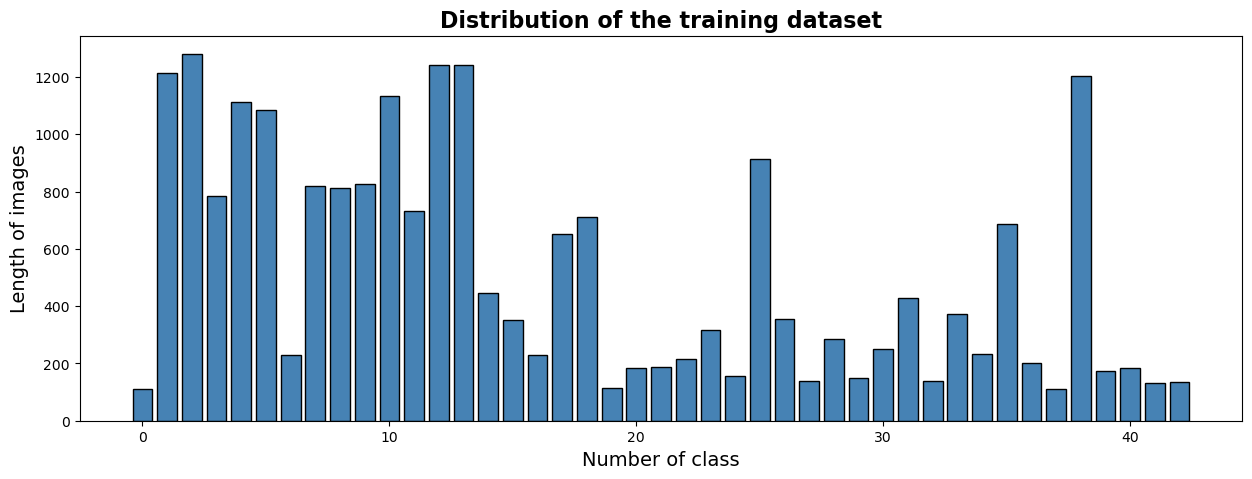

In [17]:
# 15 mean to length of figure & 5 mean to height of figure
plt.figure(figsize=(15, 5))

# start 0 to lengthofClasses, 
plt.bar(range(0, lengthOfClasses), numberOfSamples, color="steelblue", edgecolor='black')
plt.title("Distribution of the training dataset", fontsize=16, fontweight='bold')
plt.xlabel("Number of class", fontsize=14)
plt.ylabel("Length of images", fontsize=14)
plt.show()

### Virtualize with line chart

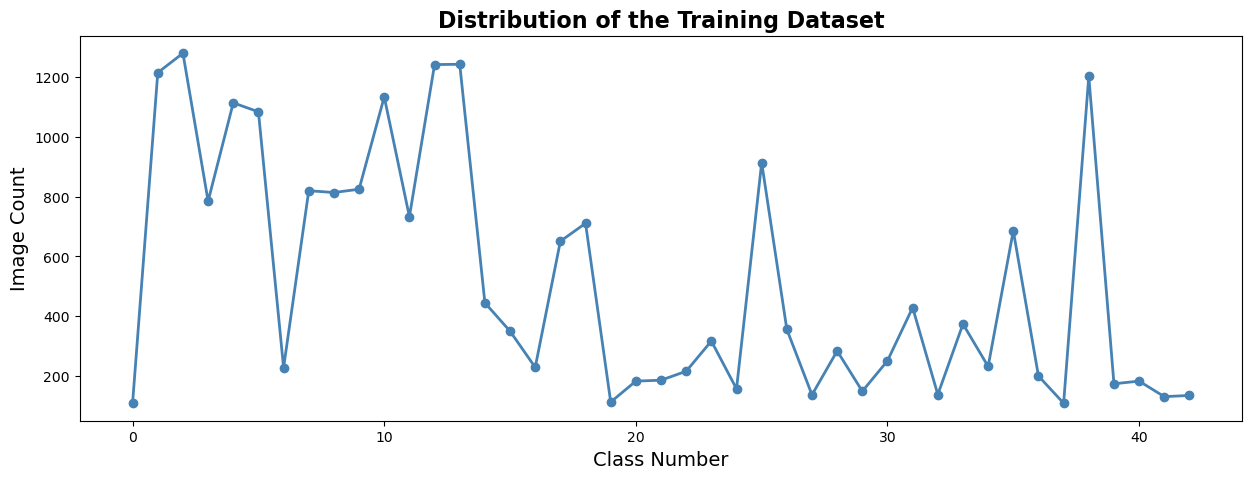

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(range(0, lengthOfClasses), numberOfSamples, marker='o', color="steelblue", linewidth=2)
plt.title("Distribution of the Training Dataset", fontsize=16, fontweight='bold')
plt.xlabel("Class Number", fontsize=14)
plt.ylabel("Image Count", fontsize=14)
plt.show()


### Read the CSV file
- to read the csv files, the pandas library need to import

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv(label_file)
print("data shape ", data.shape, type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


#### What is data
- it is a DataFrame object

In [21]:
print("All the information inside data")
print(data)

print("\nPrint only one row of that")
print(data.iloc[0])


All the information inside data
    ClassId                                               Name
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14            

### Display image for each class

In [22]:
import random

#### Numpy Array
- it is 3-dimensional NumPy array which store the pixels of the images
- For example [70, 65, 61] is a RGB color

In [23]:
print(X_train[0])

[[[ 75  39  30]
  [ 44  32  34]
  [ 31  30  32]
  ...
  [ 77  79  87]
  [ 73  82  91]
  [ 83 101 114]]

 [[ 83  49  39]
  [ 62  48  47]
  [ 47  44  45]
  ...
  [ 87  87  95]
  [ 81  87  97]
  [ 92 104 120]]

 [[ 85  61  56]
  [ 78  66  67]
  [ 73  68  74]
  ...
  [ 92  93 108]
  [ 84  88 102]
  [ 80  90 105]]

 ...

 [[ 47  56  65]
  [ 77  93 109]
  [ 83 100 116]
  ...
  [ 54  56  65]
  [ 57  59  65]
  [ 58  58  61]]

 [[ 50  55  67]
  [ 75  89 109]
  [ 87 102 118]
  ...
  [ 62  69  82]
  [ 66  71  77]
  [ 66  65  63]]

 [[ 53  48  53]
  [ 55  58  71]
  [ 55  60  68]
  ...
  [ 63  75  89]
  [ 70  77  84]
  [ 72  69  66]]]


#### Explanation about the below code

- imshow() that display an image
- x_selected[random_index, :, :] get the ramdom image, :, : that take all pixel values in dimensions
- axs[col].axis("off") to hide the unnecessary number

Total number for class number 0 : 111


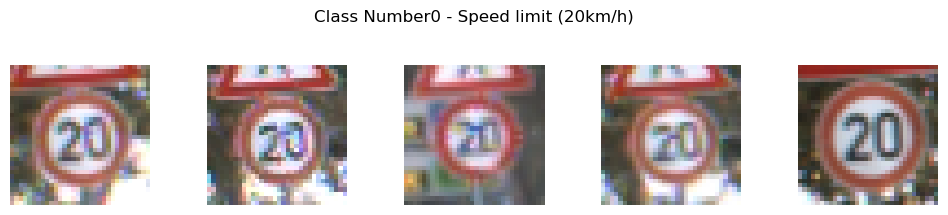

Total number for class number 1 : 1215


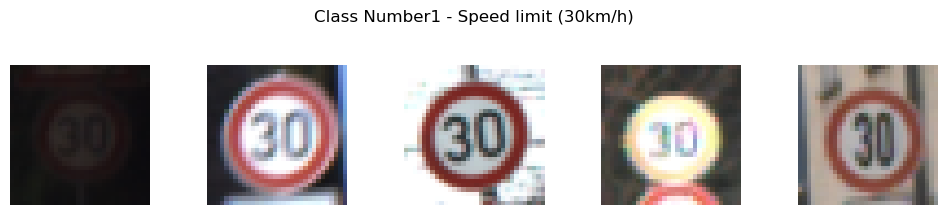

Total number for class number 2 : 1280


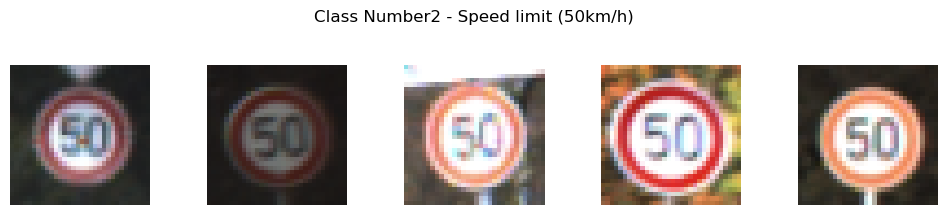

Total number for class number 3 : 785


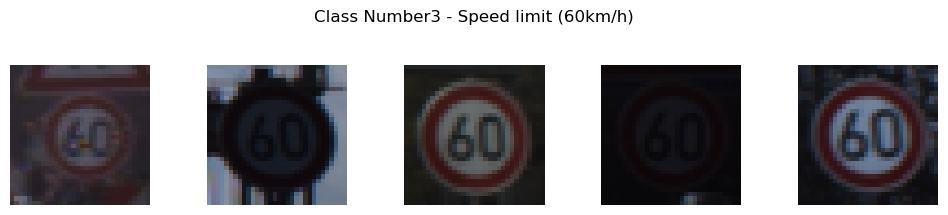

Total number for class number 4 : 1114


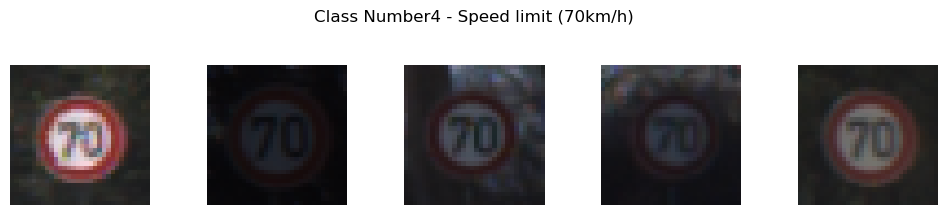

Total number for class number 5 : 1084


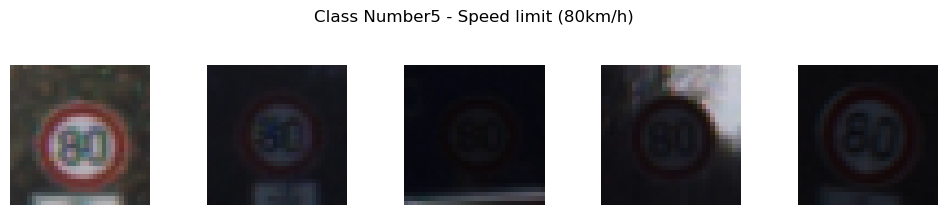

Total number for class number 6 : 228


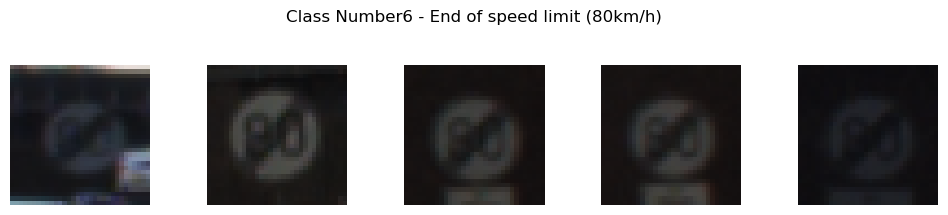

Total number for class number 7 : 820


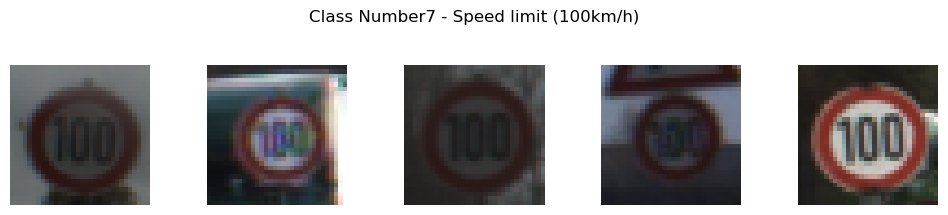

Total number for class number 8 : 814


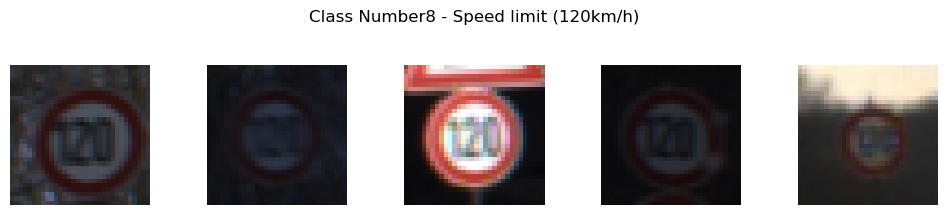

Total number for class number 9 : 825


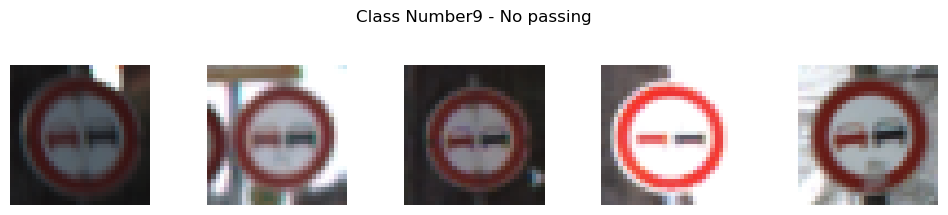

Total number for class number 10 : 1134


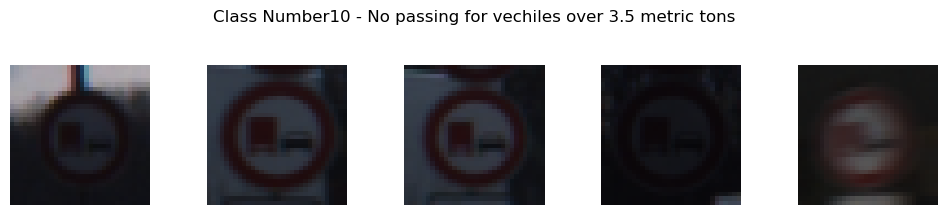

Total number for class number 11 : 733


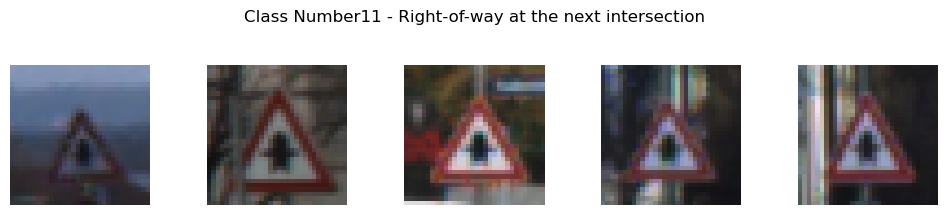

Total number for class number 12 : 1242


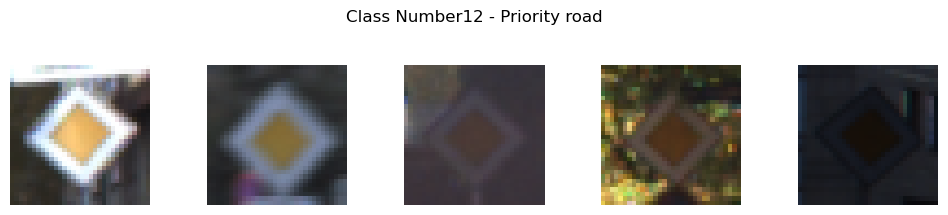

Total number for class number 13 : 1243


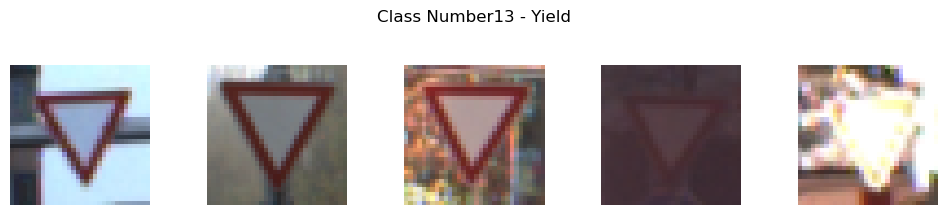

Total number for class number 14 : 445


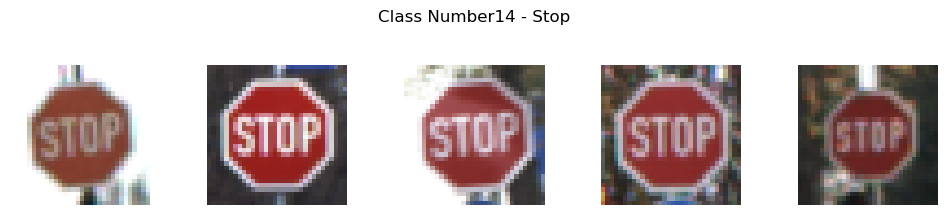

Total number for class number 15 : 350


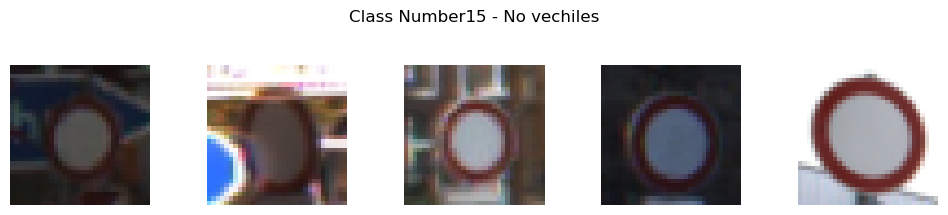

Total number for class number 16 : 229


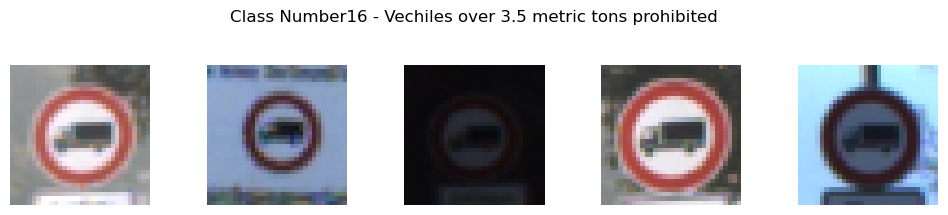

Total number for class number 17 : 651


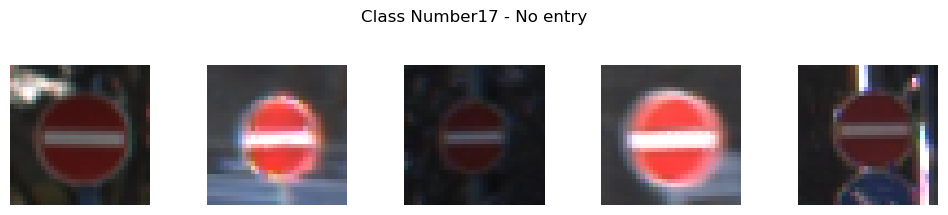

Total number for class number 18 : 711


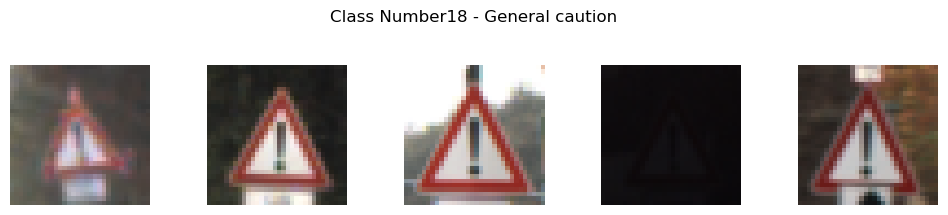

Total number for class number 19 : 113


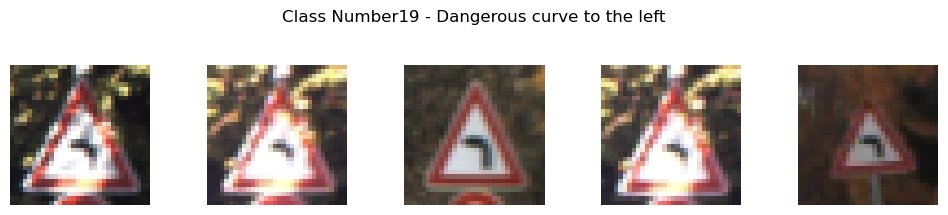

Total number for class number 20 : 183


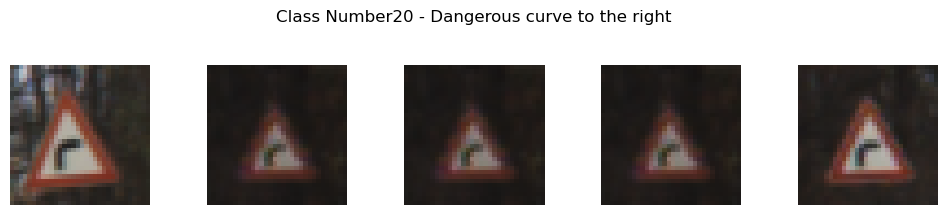

Total number for class number 21 : 186


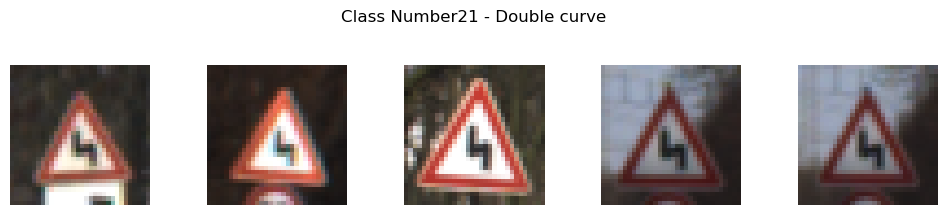

Total number for class number 22 : 216


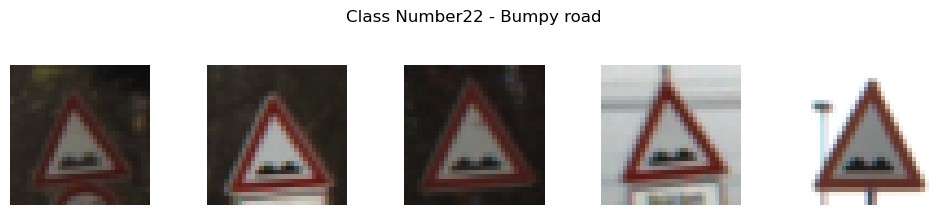

Total number for class number 23 : 317


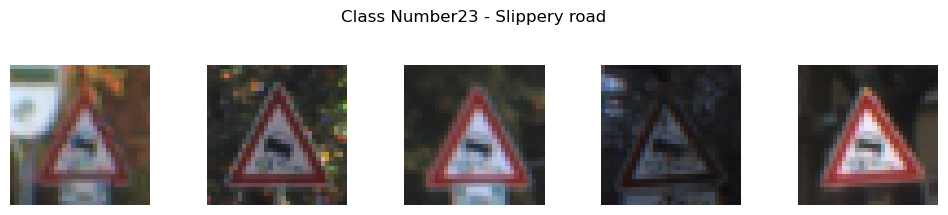

Total number for class number 24 : 157


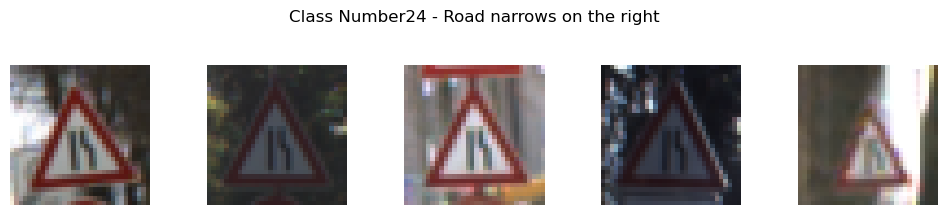

Total number for class number 25 : 914


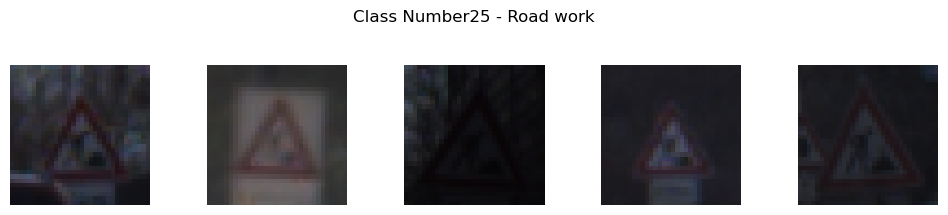

Total number for class number 26 : 356


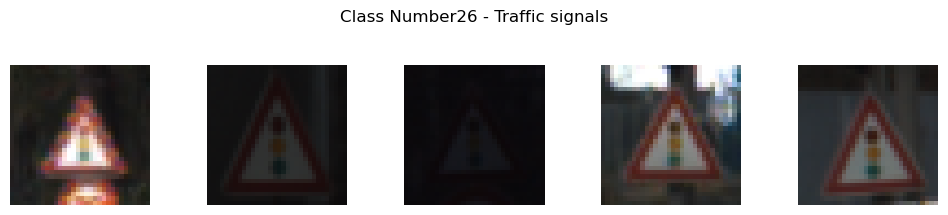

Total number for class number 27 : 137


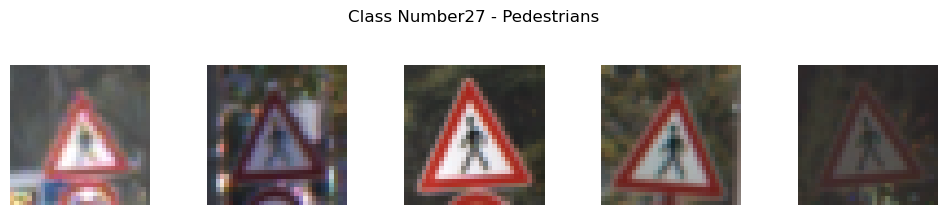

Total number for class number 28 : 284


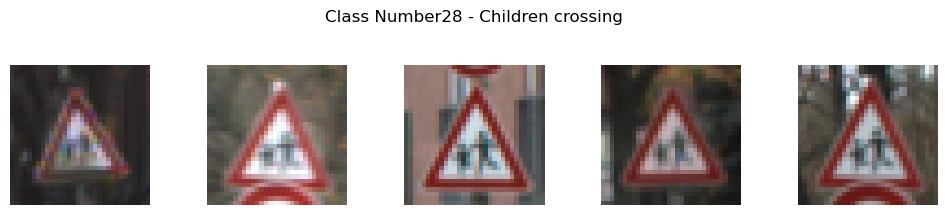

Total number for class number 29 : 149


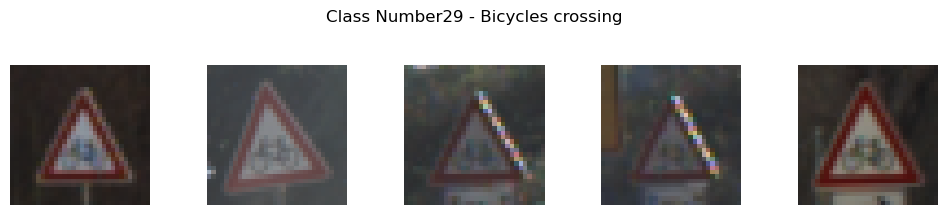

Total number for class number 30 : 251


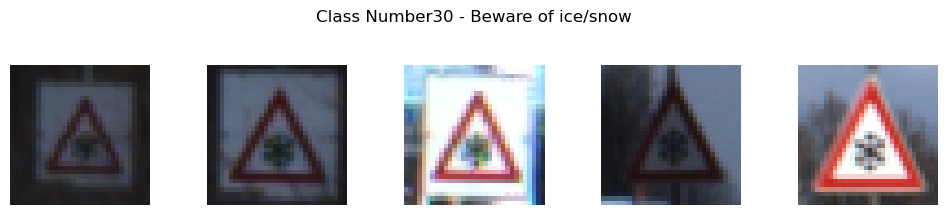

Total number for class number 31 : 429


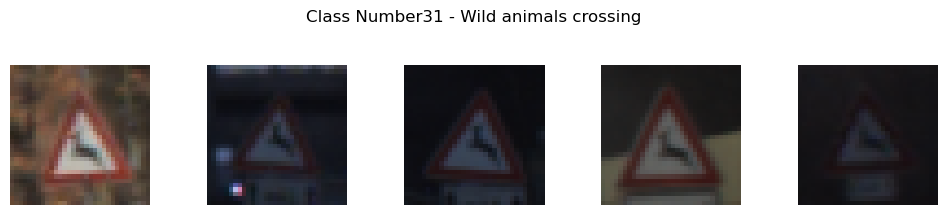

Total number for class number 32 : 138


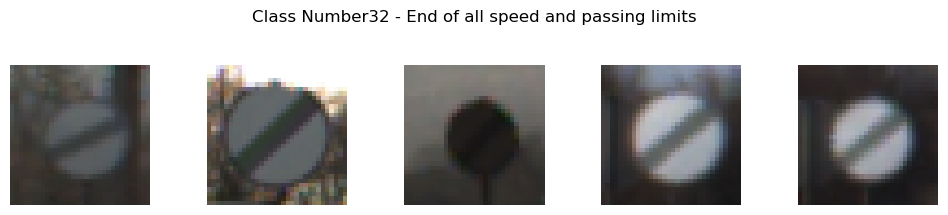

Total number for class number 33 : 374


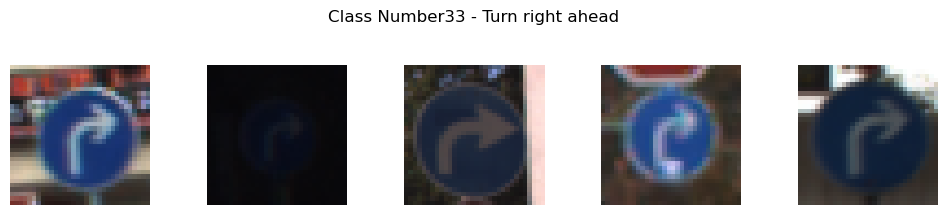

Total number for class number 34 : 232


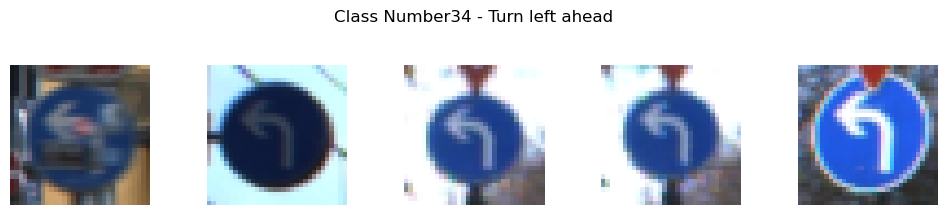

Total number for class number 35 : 686


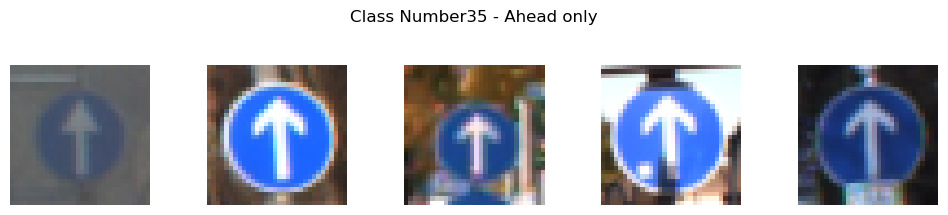

Total number for class number 36 : 200


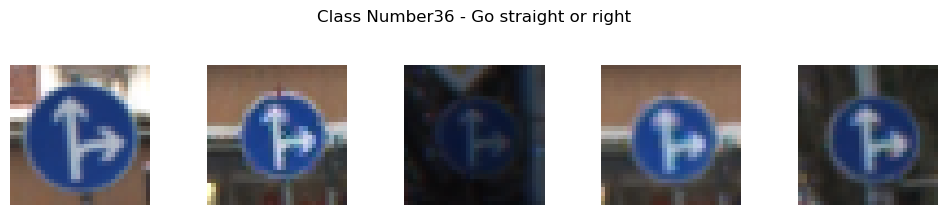

Total number for class number 37 : 109


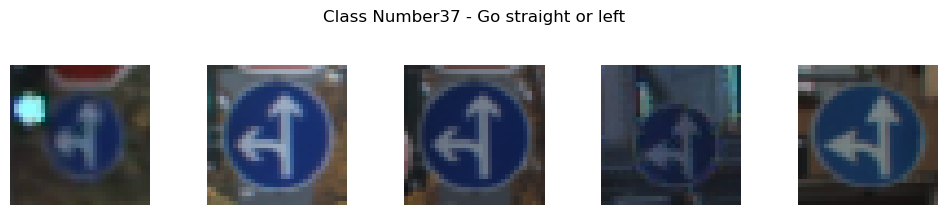

Total number for class number 38 : 1203


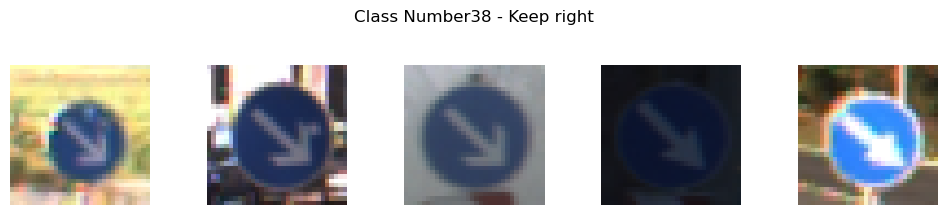

Total number for class number 39 : 174


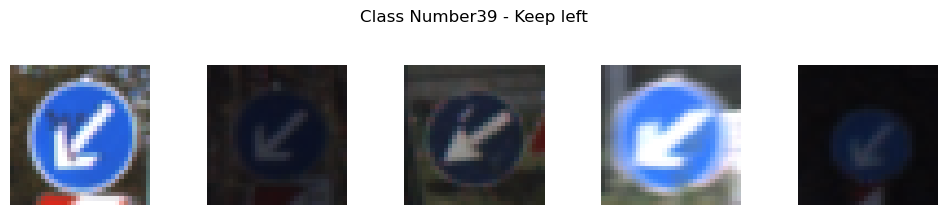

Total number for class number 40 : 183


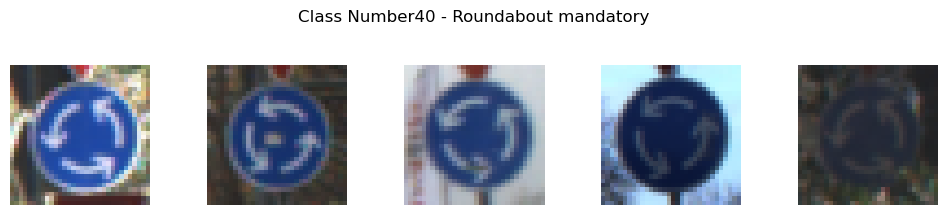

Total number for class number 41 : 131


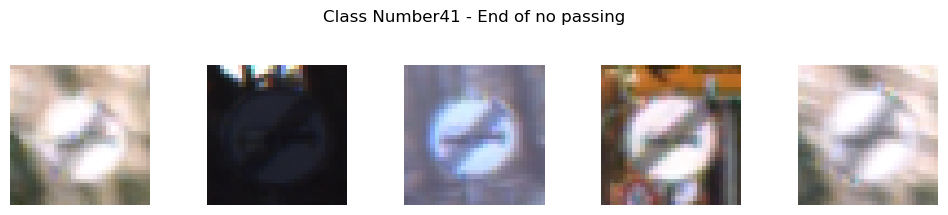

Total number for class number 42 : 135


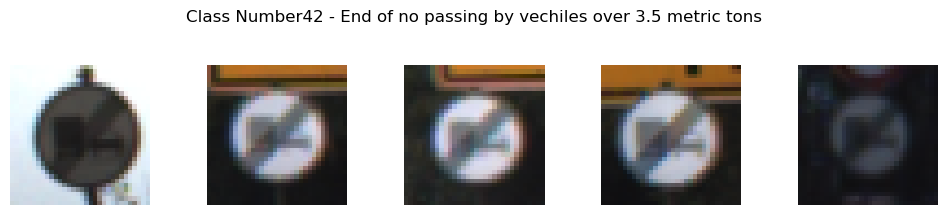

In [24]:
columns = 5

# Loop through each class and create a new figure for each
for classNo, row in data.iterrows():
    #print(row)
    fig, axs = plt.subplots(nrows=1, ncols=columns, figsize=(10, 2)) # ouput for 1 row with 5 columns
    fig.suptitle(f"Class Number{classNo} - {row['Name']}", fontsize=12, y=1.05) # ouput the tile for the plot Class [class id] - row['Name']

    # get the pixels values of image, in this case, filter the correct image that match with classNO
    x_selected = X_train[y_train == classNo]    
    lengthOfXselect = len(x_selected)
    print(f"Total number for class number {classNo} : {lengthOfXselect}")

    if lengthOfXselect == 0: 
        print(f"No images found for class number {classNo}. Skipping...")
        plt.close(fig)
        continue
    
    for col in range(columns):
        # get random inxdex from selected images which is numpy array
        random_index = random.randint(0, lengthOfXselect - 1)
        axs[col].imshow(x_selected[random_index, :, :], cmap="gray")
        # hide the axis number to view clearly
        axs[col].axis("off")
    
    # print out the image
    plt.tight_layout() # make the layout for photo
    plt.show() # print our photo

### Convert to gray image, equalize the light, hist, and normalize it (0 -255) to 0 - 1
#### the next thing is about preprocess all the images

- first make the function
- make image color to bgr to gray
- then equalize the image (mean make the lighting of image) so equalizeHist
- then we are going to normalize value, it means that gray scale value 0 - 255, we want to normalize 0 to 1
- normalize pixel values to [0, 1], want to restrict it from 0 to 1
- to have better training process
- output gray image

In [25]:
# function of convert gray image and euqlaise hist to image
def gray_and_lighting(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    return img

# function for preprocessing
def preprocessing(img):
    img = gray_and_lighting(img)
    img = img / 255
    return img

# images are in X_train and it will map and call the preprocessing function, this will give us a list
X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_validation = np.array(list(map(preprocessing, X_validation)))

### Reshaping the images data with 1 becuase of gray images (3 channel to 1 channel)
- X_train.shape's [0] has number of images, [1] has height, and [2] has width

In [26]:
# Before Reshape
print("Before reshape", X_train.shape)

# Reshaping X_train
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)

# After Reshape
print("After reshape", X_train.shape)

Before reshape (22271, 32, 32)
After reshape (22271, 32, 32, 1)


##### If you want to view  image in X_train

In [27]:
# X_train = np.array(list(map(preprocessing, X_train)))
# img = X_train[30]
# img = cv2.resize(img,(300,300))
# cv2.imshow("Haha", img)
# cv2.waitKey(5000)
# cv2.destroyAllWindows()

### Data Augmentation To Make More Generic

In [37]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

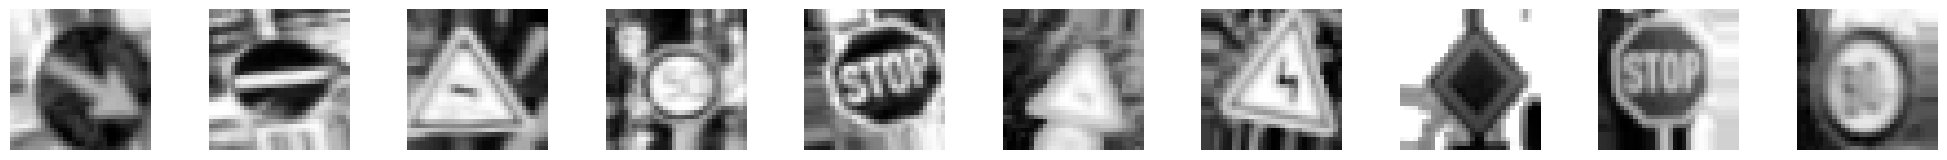

In [29]:
"""
Declare dataGenerator which is for Data Augmentation such as width & height shift, zoom in, shear, and rotate it
"""
dataGenerator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
dataGenerator.fit(X_train)

# flow method will create batches fo augment images, in this case 1 batch contain batch size of 20
# it is good for deal with large data, so this will feed them to the model, one batch at time
batches = dataGenerator.flow(X_train, y_train, batch_size=20)

# get the 1 batch from batches, X_batch contrain 20, and y_batch contrain label for X_batch
X_batch, y_batch = next(batches)

# Show the Augment image for 10 images
fig, axs = plt.subplots(1, 10, figsize=(20, 5))
fig.tight_layout()  # Adjust spacing to prevent overlap


for i in range(10):
    # Display each augmented image (reshaping to the original image dimensions)
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0], imageDimesions[1]), cmap='gray')
    axs[i].axis('off')
plt.show()






### One Hot Encoding
- import the library of to_categorical
- to convert label into One-hot-encoded format for classification
- use use one-hot encoded vectors, when predicting probabilities for different categories
- convert y_train (int value) to one-hot-encoded value, need the length of classes
- categorical cross-entropy loss function expects one-hot encoded labels

In [30]:
y_train = to_categorical(y_train, lengthOfClasses )
y_validation = to_categorical(y_validation, lengthOfClasses )
y_test = to_categorical(y_test, lengthOfClasses )

### CONVOLUTION NEURAL NETWORK MODEL (CNN Model)
- Now using the CNN model which is for deep learning
- Use sequential model

#### 1st convolutional layers function
- activation function --> ReLU, Softmax, tanH and the Sigmoid functions
- ReLU (Rectified Linear Unit) that help model to learn complex patterns
- filter_number for filters, filter1_size for kernel size, input shape (gray or 1 channel), and pool_size for reduce the spatial dimensions

#### 2nd convolutional layers function
- smaller filter number,kernel size is (3, 3), and use relu too
- MaxPooling2D reduce the spatial dimensions
- prevent overfitting by droping out 50% of connections during training

### 3rd is call dense layer
- process the high-level features extracted by the convolutional layers and make predictions.
- flatten will reshape multi-dimensional feature and become 1 dimension
- model.add(Dense(node_number, activation='relu')) for to leaen complex pattern
- a rate of 0.5 to keep things regular
- uses a softmax activation function to give each class a probability

### compile model
- This function builds the model using the Adam optimizer with a learning rate of 0.001.
- It also chooses categorical_crossentropy as the loss function, which is perfect for multi-class classification tasks.
- The model will keep track of its accuracy as a performance measure.

In [1]:
# Add 1st convolutional layers
def convolutional_layers(model, filter_number, filter1_size, pool_size, input_shape):
    model.add(Conv2D(filter_number, filter1_size, input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filter_number, filter1_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))

# Add 2nd convolutional layers
def convolutional_block(model, filter_number, filter2_size, pool_size):
    model.add(Conv2D(filter_number // 2, filter2_size, activation='relu'))
    model.add(Conv2D(filter_number // 2, filter2_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Dropout(0.5))

# Dense layers 
def dense_layers(model, node_number, lengthOfClasses):
    model.add(Flatten())
    model.add(Dense(node_number, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(lengthOfClasses, activation='softmax'))

# compile the model using Adam optimizer
def compile_model(model):
    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# The main model function
def myModel(imageDimesions, lengthOfClasses):
    filter_number = 60
    filter1_size = (5, 5)
    filter2_size = (3, 3)
    pool_size = (2, 2)
    node_number = 500 # node number for dense layer

    model = Sequential()
    input_shape = (imageDimesions[0], imageDimesions[1], 1) # get the shape and 1 dimension
    
    # call the functions to add layers
    convolutional_layers(model, filter_number, filter1_size, pool_size, input_shape)
    convolutional_block(model, filter_number, filter2_size, pool_size)
    dense_layers(model, node_number, lengthOfClasses)
    
    # call complie model and get the result
    compile_model(model)
    
    return model

### Usage of parameters
- batch_size mean that 50 samples will be processed together in each training step
- 2000 steps per epoch
- greater epochs improve the model's accuracy

In [32]:
batch_size = 50
steps_per_epoch = 2000
epochs= 25

In [33]:
model = myModel(imageDimesions, lengthOfClasses)
print(model.summary())
history = model.fit(dataGenerator.flow(X_train, y_train, batch_size=batch_size), 
                    epochs=epochs, 
                    validation_data=(X_validation, y_validation), 
                    steps_per_epoch=steps_per_epoch,
                    verbose=1)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 30)       │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       240,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        21,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 445/2000 ━━━━━━━━━━━━━━━━━━━━ 1:19 51ms/step - accuracy: 0.1520 - loss: 3.1744

2024-11-10 20:38:11.249893: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.2539 - loss: 2.7269 - val_accuracy: 0.7267 - val_loss: 0.9275
Epoch 2/25
 445/2000 ━━━━━━━━━━━━━━━━━━━━ 1:17 50ms/step - accuracy: 0.5459 - loss: 1.4921

2024-11-10 20:38:35.270872: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.5771 - loss: 1.3898 - val_accuracy: 0.8263 - val_loss: 0.5321
Epoch 3/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.6870 - loss: 1.0064 - val_accuracy: 0.9380 - val_loss: 0.2496
Epoch 4/25
 446/2000 ━━━━━━━━━━━━━━━━━━━━ 1:20 52ms/step - accuracy: 0.7499 - loss: 0.7876

2024-11-10 20:39:24.236564: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.7575 - loss: 0.7742 - val_accuracy: 0.9623 - val_loss: 0.1653
Epoch 5/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.7958 - loss: 0.6455 - val_accuracy: 0.9767 - val_loss: 0.1140
Epoch 6/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8278 - loss: 0.5554 - val_accuracy: 0.9777 - val_loss: 0.0913
Epoch 7/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8512 - loss: 0.4789 - val_accuracy: 0.9768 - val_loss: 0.0830
Epoch 8/25
 446/2000 ━━━━━━━━━━━━━━━━━━━━ 1:21 52ms/step - accuracy: 0.8572 - loss: 0.4538

2024-11-10 20:41:05.236802: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8582 - loss: 0.4500 - val_accuracy: 0.9811 - val_loss: 0.0795
Epoch 9/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8699 - loss: 0.4148 - val_accuracy: 0.9788 - val_loss: 0.0699
Epoch 10/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8827 - loss: 0.3743 - val_accuracy: 0.9885 - val_loss: 0.0533
Epoch 11/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8882 - loss: 0.3568 - val_accuracy: 0.9876 - val_loss: 0.0492
Epoch 12/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8938 - loss: 0.3388 - val_accuracy: 0.9758 - val_loss: 0.0778
Epoch 13/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9018 - loss: 0.3199 - val_accuracy: 0.9880 - val_loss: 0.0391
Epoch 14/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9007 - loss: 0.3135 - val_accuracy: 0.9905 - val_loss: 0.0396
Epoch 15/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9100 - loss

2024-11-10 20:44:27.669820: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9112 - loss: 0.2872 - val_accuracy: 0.9914 - val_loss: 0.0367
Epoch 17/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9133 - loss: 0.2769 - val_accuracy: 0.9872 - val_loss: 0.0503
Epoch 18/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9162 - loss: 0.2626 - val_accuracy: 0.9921 - val_loss: 0.0359
Epoch 19/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.9211 - loss: 0.2512 - val_accuracy: 0.9914 - val_loss: 0.0342
Epoch 20/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.9221 - loss: 0.2503 - val_accuracy: 0.9901 - val_loss: 0.0348
Epoch 21/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.9208 - loss: 0.2556 - val_accuracy: 0.9935 - val_loss: 0.0243
Epoch 22/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.9275 - loss: 0.2359 - val_accuracy: 0.9943 - val_loss: 0.0263
Epoch 23/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.9297 - los

In [34]:
 # Saving model in h5 format
model.save('Traffic_Sign_Model.h5') 

In [39]:
# Evaluation
model = load_model('Traffic_Sign_Model.h5')

score = model.evaluate(X_test, y_test, verbose=0)
print("Result of Loss Value:", score[0])
print("Result of Accuracy:", score[1])

model1 = load_model('Traffic_Sign_Model_old.h5')

score1 = model1.evaluate(X_test, y_test, verbose=0)
print("Result of Loss Value:", score1[0])
print("Result of Accuracy:", score1[1])

Result of Loss Value: 0.035824261605739594
Result of Accuracy: 0.9887930750846863
Result of Loss Value: 0.018810970708727837
Result of Accuracy: 0.9949712753295898


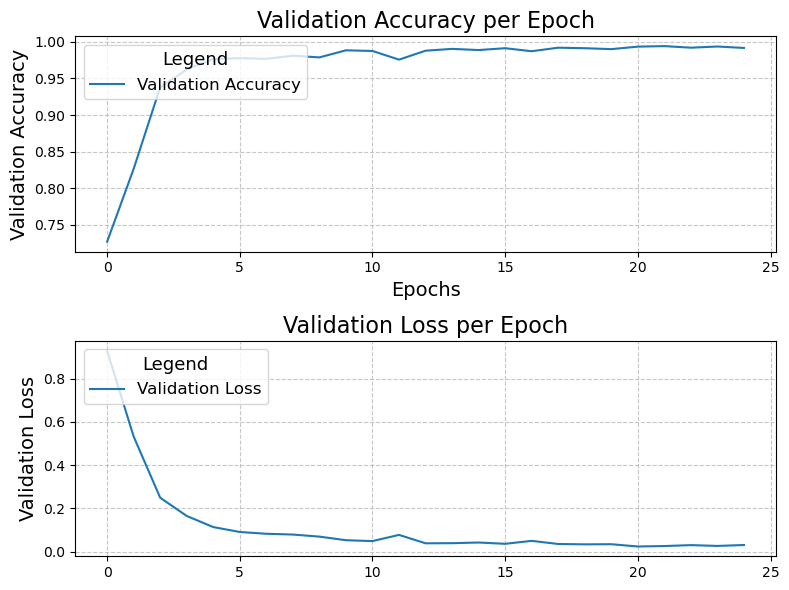

In [ ]:
# Extract the dictionary of metrics
history_dict = history.history 

# Set up the plot
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

# Get the validation accuracy and loss
val_acc = history_dict.get('val_accuracy', [])
val_loss = history_dict.get('val_loss', [])

# Plot validation accuracy and loss
ax1.plot(val_acc, label='Validation Accuracy')
ax2.plot(val_loss, label='Validation Loss')

# Add label
ax1.set_ylabel('Validation Accuracy', fontsize=14)
ax2.set_ylabel('Validation Loss', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=14)

# Add title
ax1.set_title('Validation Accuracy per Epoch', fontsize=16)
ax2.set_title('Validation Loss per Epoch', fontsize=16)

# Add grid line
ax1.grid(True, linestyle='--', alpha=0.7)
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust legend positioning for clarity
ax1.legend(fontsize=12, loc='upper left', title='Legend', title_fontsize=13)
ax2.legend(fontsize=12, loc='upper left', title='Legend', title_fontsize=13)
plt.tight_layout()
plt.show()
